# Summary statistics

## Re-do these with the new tree

On a tree with 365 tips - I want to check the tree I got the district jumps off. May need to remake one of them

### Branch lengths

- Max_H = 0.4187139080715566 
- Min_H = 0.07898788067423779


- Mean lengths = 0.024626764928399065
- Median lengths = 0.016550288168320965
- Variance in lengths = 0.0006479307331597084


- Mean external = 0.030683040421764732
- Median external = 0.022982686457671875
- Variance external = 0.0007669213909417984


- Mean internal = 0.01853712152597904
- Median internal = 0.012126822480269583
- Variance internal = 0.00045590389615045627


- Mean internal/external = 0.6041487828836514
- Median internal/external = 0.5276503468210313
- Variance internal/external = 0.5944597471594775

### Topology

 - Colless = 55126
 - Sackin = 6549
 - WD_Ratio = 0.7666666666666667
 - Delta_W = 9
 - max_ladder = 4
 - IL_nodes = 0.010958904109589041
 - staircase_1 = 0.0027472527472527475
 - staircase_2 = 0.6222222222222222


## Exploring Phylo

In [1]:
from Bio import Phylo
import numpy as np
import statistics
from collections import Counter
from collections import defaultdict

from io import StringIO
from re import *

import json

In [5]:
tree = Phylo.read("observed_tree.txt", 'newick')

string_tree = StringIO("observed_tree.txt")

In [6]:
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(comment='&chiefdom.set={"KissiTongi","Timidale","Mandu","Jawei","M...')
        Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...')
            Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...')
                Clade(branch_length=0.02370772957656392, comment='&length_range={6.732619880453E-4,0.2159093786812},chiefdo...', name='134')
                Clade(branch_length=-0.00034282080567710205, comment='&length_range={7.982579327282E-4,0.1080093118639},chiefdo...')
                    Clade(branch_length=0.004011160815643233, comment='&length_range={1.506500836645E-5,0.05847847307979},chiefd...')
                        Clade(branch_length=0.013573377488480642, comment='&length_range={1.638890351762E-4,0.2144556083053},chiefdo...')
                            Clade(branch_length=0.003726286050532268, comment='&length_range={

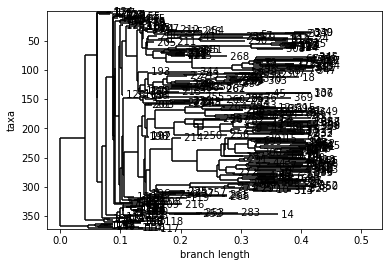

In [7]:
Phylo.draw(tree)

In [8]:
tips = tree.get_terminals()

In [9]:
len(tips)

371

In [10]:
nodes = tree.get_nonterminals()

In [11]:
len(nodes)

370

In [12]:
all_points = tips + nodes

In [22]:
for i in tips:
    if i.branch_length == 0:
        print(i)
    #print(i.branch_length)

## Branch length stuff

In [34]:
path_lists = defaultdict(list)

for tip in tips:
    path_lists[tip.name] = (tree.get_path(tip))
    
#Because it should just be to tips! Not interested atm in nodes
#for node in nodes:
 #   path_lists.append(tree.get_path(node))
    
path_lists

defaultdict(list,
            {'1': [Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...'),
              Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...'),
              Clade(branch_length=-0.00034282080567710205, comment='&length_range={7.982579327282E-4,0.1080093118639},chiefdo...'),
              Clade(branch_length=0.008930999086309288, comment='&length_range={7.617233123569E-5,0.1130208525864},chiefdo...'),
              Clade(branch_length=0.006696187173913071, comment='&length_range={5.697094205614E-6,0.1479498829035},chiefdo...'),
              Clade(branch_length=0.01077819341185099, comment='&length_range={8.038316250519E-5,0.1944452265352},chiefdo...'),
              Clade(branch_length=0.002338042825230535, comment='&length_range={1.276372726622E-6,0.0414140373259},chiefdo...'),
              Clade(branch_length=-0.0018062149084934753, comment='&lengt

In [35]:
path_lengths = []

for tip, path in path_lists.items():
    print("new clade", tip)
    path_len = 0
    for clade in path:
        print(clade.name, clade.branch_length)
        path_len += clade.branch_length
        
    path_lengths.append(path_len)

new clade 134
None 0.04201204246140988
None 0.019037850088479136
134 0.02370772957656392
new clade 121
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.004011160815643233
None 0.013573377488480642
121 0.003726286050532268
new clade 137
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.004011160815643233
None 0.013573377488480642
137 0.009205738105474315
new clade 122
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.004011160815643233
122 0.017299663539012966
new clade 123
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
123 0.014083526874539731
new clade 127
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
Non

None 0.004591850146863974
None -0.001439144060424502
None 0.006427161471237175
None 0.0013543714834688414
None 0.0006912954158044826
205 0.011586722362017299
new clade 21
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.001948231948597945
None 0.002752376149896041
None 0.006337274555890893
None 0.019611204945789107
None 0.004571457228883968
None 0.004591850146863974
None -0.001439144060424502
None 0.006427161471237175
None 0.0013543714834688414
None 0.0006912954158044826
None 0.03408907942224809
None 0.013553760547341143
None 0.12392539614963122
None 0.034066160660024214
21 0.055267394075930565
new clade 325
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None

None 0.004591850146863974
None -0.001439144060424502
None 0.006427161471237175
None 0.011508115407932729
None 0.02110469400495918
None 0.043309993834985655
None 0.06666275987414355
None 0.016833554295751813
None 0.011145046657194069
None 0.008879376119819982
None 0.001472058758767436
None 0.0015004739662523303
None 0.08454754447347093
None 0.009748198643459771
31 0.005413723909443835
new clade 67
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.001948231948597945
None 0.002752376149896041
None 0.006337274555890893
None 0.019611204945789107
None 0.004571457228883968
None 0.004591850146863974
None -0.001439144060424502
None 0.006427161471237175
None 0.011508115407932729
None 0.02110469400495918
None 0.043309993834985655
None 0.06666275987414355

None 0.002752376149896041
None 0.006337274555890893
None 0.019611204945789107
None 0.00023840987108431078
None 0.0021327783765158204
None 0.0028184416809509116
None 0.007378200451685135
None 0.005778345886238601
None 0.02822384731408356
None 0.03143020572286487
None 0.0652891991211198
None 0.019427344439164912
None 0.029439843679970795
3 0.005490111202831216
new clade 302
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.001948231948597945
None 0.002752376149896041
None 0.006337274555890893
None 0.019611204945789107
None 0.00023840987108431078
None 0.0021327783765158204
None 0.0028184416809509116
None 0.007378200451685135
None 0.005778345886238601
None 0.02822384731408356
None 0.03143020572286487
None 0.0652891991211198
302 0.06805592945898087

new clade 231
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.001948231948597945
None 0.002752376149896041
None 0.006337274555890893
None 0.019611204945789107
None 0.00023840987108431078
None 0.0021327783765158204
None 0.0028184416809509116
None 0.007378200451685135
None 0.005778345886238601
None 0.0070879249159491176
None 0.019859514455660476
None 0.010194560344334719
None 0.020104186702455534
231 0.01246532396574837
new clade 199
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.001948231948597945

None 0.012957161959660679
None 0.05000685415236694
None 0.028351673035607622
None 0.03235077907139597
None 0.04666189425083164
None 0.012619640862015197
309 0.04812775517456441
new clade 305
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.0073134870674252395
None 0.004040294973498282
None 0.00366337451809573
None 0.012957161959660679
None 0.05000685415236694
None 0.028351673035607622
None 0.03235077907139597
None 0.04666189425083164
None 0.012619640862015197
305 0.034429125037550246
new clade 288
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696

None 0.008087392851286623
None 0.004523509758539129
None 0.0033689033773444677
11 0.028845713566525294
new clade 69
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.0073134870674252395
None 0.004040294973498282
None 0.00366337451809573
None 0.012957161959660679
None 0.03194471489819703
None 0.01758295887188524
None 0.030870463229906803
None -0.00836249101904904
None -0.006363775218347939
None 0.04184663306203992
None 0.022456675433050965
None 0.020764542869851632
None 0.0033752726738235928
None 0.008087392851286623
None 0.004523509758539129
None 0.0033689033773444677
69 0.07542105603228297
new clade 42
None 0.04201

None 0.006693439458961392
None 0.03707449290070472
None 0.040821510436388236
None 0.041307929541058025
None 0.006398096330075709
15 0.09277735757760755
new clade 301
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.010456227429668785
None 0.0008174578544414279
None 0.001527225454484027
None 0.006693439458961392
None 0.03707449290070472
None 0.040821510436388236
None 0.041307929541058025
None 0.006398096330075709
None -0.0022829165502348536
None 0.005844640796695971
301 0.06181837305711771
new clade 25
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.00

new clade 87
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.010456227429668785
None 0.0008174578544414279
None 0.001527225454484027
None 0.006693439458961392
None 0.03707449290070472
None 0.040821510436388236
None 0.041307929541058025
None 0.006398096330075709
None -0.0022829165502348536
None 0.005844640796695971
None 0.01219214258392523
None 0.02157708738061581
None 0.012036726138342085
None 0.03243483172100678
87 0.04659128386335787
new clade 66
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.0023

None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.010456227429668785
None 0.0008174578544414279
None 0.001527225454484027
None 0.006693439458961392
None 0.03707449290070472
None 0.040821510436388236
None 0.034664040260054346
None 0.0029557120243793034
None 0.011529402616489992
None 0.01584658571094999
None 0.016164017531952846
None 0.019419875659993813
None 0.03166563380033016
107 0.05481345831034862
new clade 32
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.01045622742966878

None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.022862018707971
None 0.010456227429668785
None 0.0008174578544414279
None 0.001527225454484027
None 0.006693439458961392
None 0.03707449290070472
None 0.040821510436388236
None 0.034664040260054346
None 0.004936181684284308
None 0.02961545610846536
None 0.005684422115667637
None 0.013275447164156351
None 0.01946201494863925
None 0.03424470347933212
96 0.03969700809895771
new clade 97
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.001239880885121

None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.006782128568144141
150 0.010118010684771472
new clade 184
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.0018062149084934753
None 0.0033292054574426966
None 0.000517834313106591
None 0.006066378087058011
None 0.0023309188838179784
None 0.002911099134716988
None 0.0021740511627098558
None 0.0012398808851216137
None 0.006782128568144141
None 0.016377083875032727
None 0.008355326974252897
184 0.0018239559998574073
new clade 119
None 0.04201204246140988
None 0.019037850088479136
None -0.00034282080567710205
None 0.008930999086309288
None 0.006696187173913071
None 0.01077819341185099
None 0.002338042825230535
None -0.001806214908493

In [36]:
max_H = max(path_lengths)
min_H = min(path_lengths)

print(max_H, min_H)

0.4272233755511325 0.07927817007151033


In [41]:
branch_lengths = []
internal_branches = []
external_branches = []

for tip in tips:
    branch_lengths.append(tip.branch_length)
    external_branches.append(tip.branch_length)
    
    if tip.branch_length == None:
        print(tip)

for node in nodes:
    
    if node.branch_length:
    
        branch_lengths.append(node.branch_length)
        internal_branches.append(node.branch_length)
        

In [42]:
branch_lengths

[0.02370772957656392,
 0.003726286050532268,
 0.009205738105474315,
 0.017299663539012966,
 0.014083526874539731,
 0.001072843200515483,
 0.001072843200515261,
 0.0039046753272837798,
 0.0011419489025665253,
 0.025799483149010594,
 0.0057615495224196955,
 0.029238720581838906,
 0.021019542499539245,
 0.01776458884165688,
 0.004751555250976702,
 0.008702135204407158,
 0.003222683149465,
 0.023177106297741112,
 0.0014359099073589787,
 0.0014359099073589232,
 0.0030321396878963403,
 0.0062199200729264326,
 0.0010948442545036796,
 0.0010948442545036796,
 0.002316440297445599,
 0.002316440297445599,
 0.004034174627238152,
 0.0076615025624464095,
 0.006496166306355411,
 0.01471534438865485,
 0.004046795282129367,
 0.010090946634620235,
 0.05118683704543581,
 0.04688214671260507,
 0.016745160411218818,
 0.027860224012188434,
 0.027860224012188434,
 0.03170755414950685,
 0.03444728017686441,
 0.011194195051714734,
 0.16297388198612728,
 0.01553690535405905,
 0.023073061044235066,
 0.0697860177

In [43]:
statistics.mean(branch_lengths)

0.024554999389390132

In [45]:
statistics.variance(branch_lengths)

0.0006457965315134023

In [44]:
statistics.median(branch_lengths)

0.01618327945212711

In [46]:
print(statistics.mean(external_branches))
print(statistics.median(external_branches))
print(statistics.variance(external_branches))

0.030333644010762013
0.021228056094926562
0.0007945437958549986


In [47]:
print(statistics.mean(internal_branches))
print(statistics.median(internal_branches))
print(statistics.variance(internal_branches))

0.01874503420096475
0.011576011003413655
0.00043048336004913076


In [50]:
statistics.median(internal_branches)/statistics.median(external_branches)

0.5453165825287359

## Topology set

In [59]:
path_lists_nodes = []

    
for node in nodes:
    path_lists_nodes.append(tree.get_path(node))
    
path_lists_nodes

[[],
 [Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...')],
 [Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...'),
  Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...')],
 [Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...'),
  Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...'),
  Clade(branch_length=-0.00034282080567710205, comment='&length_range={7.982579327282E-4,0.1080093118639},chiefdo...')],
 [Clade(branch_length=0.04201204246140988, comment='&length_range={2.507881418368E-6,0.4276205901572},chiefdo...'),
  Clade(branch_length=0.019037850088479136, comment='&length_range={4.558633184923E-4,0.02081780303343},chiefd...'),
  Clade(branch_length=-0.00034282080567710205, comment='&

In [51]:
colless = 0

for node in nodes:
    
    total_path = 0
    path = tree.get_path(node)
    
    for clade in path:
        total_path += clade.branch_length
        
    
    right = np.sum(i > total_path for i in path_lengths)
    left = np.sum(i <= total_path for i in path_lengths)
    
    difference = abs(left - right)
    
    colless += difference
    
    uneven = 0
    sum_ratios = []
    
    if right != left:
        uneven += 1

    if left<right:
        ratio = left/right
    elif right<left:
        ratio = right/left
    else:
        ratio = 1

    sum_ratios.append(ratio)
        
    staircase_1 = uneven/len(nodes)

    staircase_2 = np.mean(sum_ratios)
    
print(colless)
print(staircase_1)
print(staircase_2)

56120
0.002702702702702703
0.11077844311377245


/Users/s1743989/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  if sys.path[0] == '':
/Users/s1743989/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]


In [58]:
sackin = 0
step_list = []

for path in path_lists.values():
    steps = len(path) #This includes the tip but not the root, so the number is actually right
    step_list.append(steps)
    sackin += steps
    
print(sackin)

8835


In [60]:
total_steps = 0
step_list = []

for path in path_lists_nodes:
    steps = len(path) #This includes the tip but not the root, so the number is actually right
    step_list.append(steps)
    total_steps += steps
    

In [61]:
widths = Counter(step_list)

In [62]:
widths

Counter({0: 1,
         1: 2,
         2: 4,
         3: 6,
         4: 5,
         5: 5,
         6: 2,
         7: 3,
         8: 2,
         9: 4,
         10: 4,
         11: 7,
         12: 8,
         13: 9,
         14: 8,
         15: 7,
         16: 8,
         17: 9,
         18: 8,
         19: 9,
         20: 12,
         21: 13,
         22: 17,
         23: 22,
         24: 24,
         25: 26,
         26: 23,
         27: 22,
         28: 28,
         29: 24,
         30: 15,
         31: 15,
         32: 9,
         33: 6,
         34: 3})

In [63]:
max_depth = max(widths)
max_width = widths.most_common()[0][1]

WD_ratio = max_width/max_depth

#delta_w

tup_list = []

for k,v in widths.items():
    tup = (k,v)
    tup_list.append(tup)

sorted_widths = sorted(tup_list, key=lambda tup:tup[0])

difference = 0

for index, tup in enumerate(sorted_widths):
    if index > 0:
        new_difference =  abs(tup[1] - sorted_widths[index-1][1])
        if new_difference > difference:
            difference = new_difference

delta_w = difference

In [64]:
print(WD_ratio)

0.8235294117647058


In [65]:
print(delta_w)

9


In [28]:
for i in tips:
    if not i.name:
        print(i)

In [66]:
def all_parents(tree):
    parents = {}
    child_dict = defaultdict(list)
    for clade in tree.find_clades(order='level'):
        for child in clade:
            parents[child] = clade
            child_dict[clade].append(child)
    return parents, child_dict

# Example
parents, child_dict = all_parents(tree)
#myclade = tree.find_clades("foo").next()
#parent_of_myclade = parents[myclade]


In [82]:
def go_up_ladder(nde, ladder_length, count_list):
    
    children = child_dict[nde]
    
    if (children[0].name and not children[1].name) or (children[1].name and not children[0].name):
        
        ladder_length += 1
        
        for i in children:
            if not i.name:
                go_up_ladder(i, ladder_length, count_list)
                
    else:
        
        count_list.append(ladder_length)
        
    return 

In [120]:
count_list = []
node_set = set()

for nde in nodes:

    ladder_length = 0

    if nde not in node_set:
        go_up_ladder(nde, ladder_length, count_list)

max_ladder = max(count_list)/len(tips)

print(count_list)

[0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 3, 2, 1, 0, 4, 3, 2, 1, 0, 3, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 5, 4, 3, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 4, 3, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 5, 4, 3, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 4, 3, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 3, 2, 1, 0, 0, 

In [84]:
max_ladder 

0.02425876010781671

In [99]:
#number_of_ladders = 0
nodes_in_ladders = 0

for i in count_list:
    if i != 0:
        #number_of_ladders += 1
        nodes_in_ladders += 1
        
print(nodes_in_ladders)
        
IL_nodes = nodes_in_ladders/len(nodes)

171


In [100]:
print(IL_nodes)

0.46216216216216216


## LTT

In [101]:
class custom_node():
    
    def __init__(self, id_number, node_type, path_to_root, path_length):
        
        self.ID = id_number
        self.prep_path_to_root = path_to_root
        self.path_len = path_length
        self.type = node_type
        
        self.path_to_root = []
        
        self.children = []
        
        self.root = False
        
    

In [ ]:
#path lists is now just tips

In [102]:
for i in path_lists:
    print(i, len(i))

134 3
121 3
137 3
122 3
123 3
127 3
129 3
124 3
130 3
155 3
143 3
175 3
156 3
149 3
133 3
148 3
145 3
176 3
179 3
173 3
178 3
170 3
128 3
125 3
182 3
183 3
172 3
195 3
204 3
207 3
191 3
212 3
254 3
246 3
215 3
339 3
340 3
20 2
327 3
5 1
7 1
206 3
241 3
289 3
9 1
311 3
24 2
312 3
16 2
310 3
290 3
211 3
205 3
21 2
325 3
317 3
321 3
323 3
318 3
22 2
322 3
324 3
19 2
308 3
251 3
245 3
220 3
226 3
233 3
238 3
217 3
219 3
218 3
222 3
235 3
221 3
268 3
345 3
346 3
31 2
67 2
353 3
101 3
367 3
112 3
348 3
8 1
39 2
37 2
17 2
316 3
79 2
354 3
338 3
30 2
341 3
351 3
298 3
78 2
35 2
58 2
347 3
193 3
244 3
293 3
307 3
3 1
302 3
243 3
227 3
274 3
270 3
18 2
273 3
281 3
370 3
1 1
303 3
280 3
275 3
277 3
276 3
239 3
269 3
240 3
228 3
242 3
258 3
247 3
236 3
230 3
262 3
261 3
231 3
199 3
167 3
189 3
213 3
337 3
106 3
45 2
161 3
126 3
186 3
194 3
255 3
36 2
369 3
284 3
285 3
260 3
292 3
229 3
232 3
249 3
223 3
248 3
234 3
201 3
203 3
33 2
294 3
264 3
12 2
315 3
309 3
305 3
288 3
286 3
81 2
83 2
349 3
326

In [103]:
for i in path_lengths:
    print(i)

0.08475762212645294
0.08201789609886806
0.0874973481538101
0.08201789609886811
0.101195978290825
0.10393570431818261
0.10393570431818239
0.10119597829082505
0.10393570431818255
0.12859323856462662
0.09571652623588289
0.13681241664692584
0.12859323856462618
0.1231137865099115
0.10667543034553989
0.11489460842783938
0.10941515637289723
0.13681241664692584
0.13681241664692595
0.1368124166469259
0.1368124166469259
0.1368124166469259
0.1039357043181825
0.1039357043181825
0.13955214267428312
0.13955214267428312
0.13681241664692573
0.14503159472899796
0.15325077281129734
0.16146995089359678
0.14777132075658267
0.19434666322234007
0.23544255363315564
0.229963101578441
0.19982611527705474
0.4162644714414706
0.4162644714414706
0.40530556733181355
0.40804529335917106
0.32859323856467004
0.33681241664696865
0.16146995089359678
0.22174392349614114
0.3039357043182264
0.3422918687016845
0.3779083070577854
0.4190041974688283
0.37790830705778544
0.37516858103042816
0.3779083070577854
0.3066754303455845

In [105]:
most_recent_len = (max(path_lengths))
print(most_recent_len)

0.4272233755511325


In [106]:
point_objects = []
object_dict = {}
count = 365

for i in all_points:
    count += 1
    path_len = 0
    
    if i.name:
        new_name = "node_" + i.name
        node_type = "Tip"
        
    else:
        new_name = "node_" + str(count)
        node_type = "Node"
        
    path = tree.get_path(i)
    
    for clade in path:
        path_len += clade.branch_length
        
    new = custom_node(new_name, node_type, path, path_len)
    
    object_dict[i] = new
    
    point_objects.append(new)

In [107]:
for i in all_points:
    objct = object_dict[i]
    for j in point_objects:
        if i in j.prep_path_to_root:
            j.path_to_root.append(objct)
        

In [108]:
for i in point_objects:
    if len(i.path_to_root) > 1:
        i.parent = i.path_to_root[-2]
        print(i.parent)
        i.parent.children.append(i)
        
    elif len(i.path_to_root) == 1:
        i.parent = tree_root
        tree_root.children.append(i)
    else:
        i.parent = None
        i.root = True
        tree_root = i
        


In [109]:
for i in point_objects:
    if len(i.path_to_root) == 1:
        print(i.parent)
        
print(tree_root)

In [110]:
def sort_key(ele):
    return ele.path_len

def sort_key2(ele):
    return ele.height

In [111]:
most_recent_tip = sorted(point_objects, key = sort_key)[::-1][0]

In [112]:
longest_path = most_recent_tip.path_len

In [113]:
print(most_recent_tip.type)

Tip


In [114]:
for item in point_objects:
    item.height = longest_path - item.path_len
    
    if item.path_len == longest_path:
        print(item.ID)
    #print(item.height)

node_358


In [115]:
sorted_node_list = sorted(point_objects, key=sort_key2)

In [116]:
def get_active_population(node_list):
    
        coalescent_times = set()
        coal_tups = []
        
        active_population = {}
        
        for nde in node_list:

            if nde.type == "Node":
                
                coalescent_times.add(nde.height)
                
        coalescent_times = sorted(coalescent_times)

        current_time = 0
        non_parent_set = set() 

        for time in coalescent_times:
            
            tup = (float(current_time),float(time))
            coal_tups.append(tup)
            
            active_population[tup] = 0
            
            current_time = time

            
        previous_index = 1

        for nde in node_list:


            
            first_hit = 0

            index = previous_index - 1

            if not nde.parent:
                non_parent_set.add(nde)
                pass

            else:

                parent_height = nde.parent.height
                   
#                 print("new node")
#                 print(nde.height, parent_height)

                for time1, time2 in coal_tups[index:]:
                    index += 1
                    
#                     print(time1, time2)

                    if ((nde.height <= time1 or (nde.height <= time2 and nde.height >=time1)) and parent_height >= time2) and nde.height != parent_height:
                        first_hit += 1
                        
#                         print("match")

                        active_population[time1, time2] += 1

                        if first_hit == 1:

                            previous_index = index

                        if parent_height == time2:

                            break 
        
        if len(non_parent_set) > 1:
            print("NODES WITHOUT PARENTS" + str(len(non_parent_set)))

        
        return active_population

In [117]:
LTT = get_active_population(sorted_node_list)

In [118]:
LTT_for_writing = {}

for i,v in LTT.items():
    new_key = str(i)
    LTT_for_writing[new_key] = v

In [119]:
file = "LTT_observed.txt"

with open(file, 'w') as json_file:
    json.dump(LTT_for_writing, json_file)

## The rest of the LTT stuff is in "getting LTT bins and SS"